#                           Decision Tree

# C 5.0 

# 1. Import Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi'] = 500
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 2 .Import Dataset

In [6]:
df =  sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# 3.EDA

In [7]:
x = df.iloc[:,:-1]
y = df['species']

In [4]:
y

Id
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
            ...      
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
150    Iris-virginica
Name: Species, Length: 150, dtype: object

In [8]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [9]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
91,6.1,3.0,4.6,1.4
135,7.7,3.0,6.1,2.3
69,5.6,2.5,3.9,1.1
128,6.4,2.8,5.6,2.1
114,5.8,2.8,5.1,2.4


In [11]:
ytrain

91     versicolor
135     virginica
69     versicolor
128     virginica
114     virginica
          ...    
133     virginica
137     virginica
72     versicolor
140     virginica
37         setosa
Name: species, Length: 120, dtype: object

In [12]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0


In [13]:
ytest

14         setosa
98     versicolor
75     versicolor
16         setosa
131     virginica
56     versicolor
141     virginica
44         setosa
29         setosa
120     virginica
94     versicolor
5          setosa
102     virginica
51     versicolor
78     versicolor
42         setosa
92     versicolor
66     versicolor
31         setosa
35         setosa
90     versicolor
84     versicolor
77     versicolor
40         setosa
125     virginica
99     versicolor
33         setosa
19         setosa
73     versicolor
146     virginica
Name: species, dtype: object

# 4.Model Building

In [14]:
dt = DecisionTreeClassifier(criterion='entropy')

dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
ypred

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica'],
      dtype=object)

In [15]:
x.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [16]:
dt.feature_importances_#Information Gain Highest value -root Node remaing -decision node

array([0.00848378, 0.01710372, 0.68441966, 0.28999284])

# 5.Model Evaluation

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [19]:
confusion_matrix(ytest,ypred)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

In [20]:
dt.score(xtrain,ytrain)
dt.score(xtest,ytest)

0.9666666666666667

In [21]:
print('Training accuracy: ', dt.score(xtrain,ytrain))
print('Testing Accuracy: ', np.round(dt.score(xtest,ytest),2))

Training accuracy:  1.0
Testing Accuracy:  0.97


In [22]:
x.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [23]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [24]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

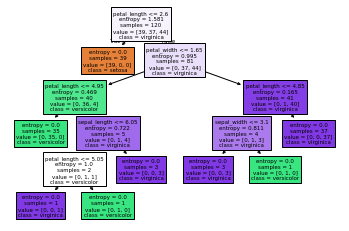

In [25]:
tree.plot_tree(dt,feature_names=x.columns, class_names=df['species'].unique(), filled=True)
plt.show()

In [26]:
x.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [27]:
dt.feature_importances_ #It returns information gain of all columns

array([0.00848378, 0.01710372, 0.68441966, 0.28999284])

# CART

<code>CLASSIFICATION</CODE>

In [28]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [29]:
dtc = DecisionTreeClassifier(criterion='gini')

In [30]:
dtc.fit(xtrain,ytrain)
ypred = dtc.predict(xtest)
ypred

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica'],
      dtype=object)

In [31]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [32]:
dtc.score(xtrain,ytrain), dtc.score(xtest,ytest)

(1.0, 0.9666666666666667)

# Regression

In [33]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [35]:
x = df.iloc[:,:3]
y = df['petal_width']

In [36]:
x

,sepal_length,sepal_width,petal_length
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4
...,...,...,...
145,6.7,3.0,5.2
146,6.3,2.5,5.0
147,6.5,3.0,5.2
148,6.2,3.4,5.4


In [37]:
y

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal_width, Length: 150, dtype: float64

In [43]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3, random_state=42)

In [39]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtr = DecisionTreeRegressor()

dtr.fit(xtrain,ytrain)
yp = dtr.predict(xtest)
yp

array([1.5, 0.4, 1.4, 1.5, 1.5, 0.2, 1. , 1.5, 1.7, 1.2, 1.7, 0.2, 0.2,
       0.2, 0.4, 1.4, 1.8, 1.3, 1.5, 1.8, 0.5, 1.8, 0.2, 1.8, 2.2, 2.1,
       1.5, 2.3, 0.2, 0.2, 0.1, 0.2, 1.4, 0.2, 0.2, 1.5, 1.5, 0.2, 0.1,
       0.2, 1.9, 1.5, 1.3, 0.2, 0.2])

In [45]:
dtr.score(xtrain,ytrain), dtr.score(xtest,ytest)

(0.9985183869425482, 0.8949315833566043)

In [46]:
from sklearn.metrics import mean_squared_error

In [47]:
mse = mean_squared_error(ytest,yp)
import numpy as np
mse

0.0668888888888889

In [48]:
rmse = np.sqrt(mse)
rmse

0.25862886321694434

In [49]:
x.columns

Index(['sepal_length', 'sepal_width', 'petal_length'], dtype='object')

In [51]:
plt.figure(figsize = (20,20),dpi = 500)
tree.plot_tree(dtr, feature_names=['SepalLength', 'SepalWidth', 'PetalLength'], filled=True)
plt.show()

# Hyperparameter tuning

In [52]:
DecisionTreeRegressor()

DecisionTreeRegressor()

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
params = {
    'criterion' : ['squared_error','absolute_error'],
    'max_depth' : [1,2,3,4,5,6,7,8,9],
    'splitter' :['best','random']
}

In [55]:
grid = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=params,
                   verbose=1)

In [56]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             verbose=1)

In [57]:
grid.best_params_

{'criterion': 'squared_error', 'max_depth': 7, 'splitter': 'random'}

In [58]:
dtr = DecisionTreeRegressor(criterion='absolute_error',
                           max_depth=8,splitter='random')

In [59]:
dtr.fit(xtrain,ytrain)
ypred  = dtr.predict(xtest)

In [60]:
dtr.score(xtrain,ytrain),dtr.score(xtest,ytest)

(0.9807390302531276, 0.9335904775202457)

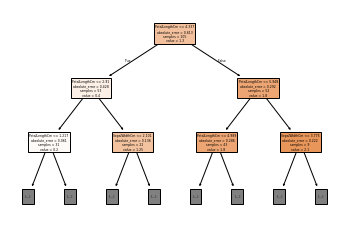

In [61]:
tree.plot_tree(dtr, feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm'],filled=True, max_depth =2 )
plt.show()